<a href="https://colab.research.google.com/github/mbraulio/Clasificacion-Inteligente-de-Datos-CID-2025B/blob/main/Hands-On%203%3A%20K-Means%20Tutorial/HO3_K_Means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Hands-on 3: K-Means Notebook (Tutorial)**

**1.1 Fundamentos de la técnica**

K-Means es un algoritmo de aprendizaje no supervisado utilizado para agrupar datos en un número determinado de grupos (clusters).
Fue propuesto por Stuart Lloyd en 1957 y popularizado por MacQueen en 1967.

El objetivo de K-Means es particionar un conjunto de datos en k grupos homogéneos, de manera que los elementos dentro de un mismo grupo sean lo más parecidos posible (minimizando la distancia dentro del grupo), y los elementos de grupos distintos sean lo más diferentes posible.

Su funcionamiento se basa en la distancia euclidiana como medida de similitud y en la actualización iterativa de los centroides, que representan el centro de cada grupo.

**1.2 Modelo Matemático del K-Means**

Sea un conjunto de datos $X = \{ x_1,x_2,.., x_n \}$ con $x_i$ $ \in \mathbb{R}^d $ el algoritmo busca particionarlo en $K$ grupos $C = \{C_1,C_2,...,C_k\}$ minimizando la suma de distancias cuadradas de cada punto a su centroide correspondiente:
$$
\min_{C} \sum_{k=1}^{K} \sum_{x_i \in C_k} \|x_i - \mu_k\|^2
$$

Donde:

$𝜇_𝑘$ = es el centroide del grupo.

$\|x_i - \mu_k\|^2$ =  es la distancia cuadrática entre el punto.

El procedimiento es iterativo y consta de las siguientes etapas:

1. **Inicialización:** Se eligen $𝐾$  centroides iniciales (aleatorios o con K-Means++).

2. **Asignación:** Cada punto se asigna al centroide más cercano.

3. **Actualización:** Se recalculan los centroides como el promedio de los puntos asignados.

4. **Iteración:** Se repiten los pasos 2 y 3 hasta que los centroides ya no cambien significativamente o se alcance el número máximo de iteraciones.

**1.3 Descripción de la librería, clases y funciones empleadas**

**KMeans**

clase de sklearn.cluster que implementa el algoritmo K-Means.

**make_blobs**

genera datos de prueba con distribución agrupada, útil para demostraciones.

**numpy**

Librería fundamental para el cálculo numérico y manejo de datos en forma de arreglos. Permite realizar operaciones vectorizadas, manipular matrices y ejecutar cálculos matemáticos de alto rendimiento.

**matplotlib.pyplot**

Módulo de la librería Matplotlib utilizado para la visualización de datos.
Proporciona una interfaz fácil de usar para generar gráficos en 2D y 3D, permitiendo representar los resultados de agrupamientos, tendencias y patrones de manera visual.

**fit()**

entrena el modelo encontrando los centroides.

**predict()**

asigna cada punto al cluster más cercano.

**inertia_**

devuelve la suma de distancias cuadradas dentro de los clusters (criterio de optimización).

**1.4 Pipeline**

**Preprocesamiento**

```python
# Generación del dataset
X, y_true = make_blobs(n_samples=300, centers=3, cluster_std=0.60, random_state=0)

# Conversión a DataFrame para facilitar el análisis
df = pd.DataFrame(X, columns=['X1', 'X2'])

# Cálculo de estadísticas básicas
media = df.mean()
desv_std = df.std()
valor_max = df.max()
valor_min = df.min()

print(" Estadísticas del Dataset:\n")
print(f"Media:\n{media}\n")
print(f"Desviación estándar:\n{desv_std}\n")
print(f"Valor máximo:\n{valor_max}\n")
print(f"Valor mínimo:\n{valor_min}\n")
```

**Prediction**

```python
def predecir_patron(modelo, patron):
    """
    Recibe un modelo K-Means entrenado y un patrón (lista o arreglo con coordenadas [x1, x2]).
    Devuelve e imprime la clase (cluster) predicha para ese patrón.
    """
    import numpy as np

    patron = np.array(patron).reshape(1, -1)  # Asegura formato 2D
    clase_predicha = modelo.predict(patron)[0]

    print(f" Patrón ingresado: {patron.flatten().tolist()}")
    print(f"  Clase (Cluster) predicha: {clase_predicha}")

    return clase_predicha
```
**Model Evaluation**
```python
from sklearn.metrics import confusion_matrix, accuracy_score

# Etiquetas predichas por el modelo
y_pred = kmeans.labels_

# Cálculo de la matriz de confusión
matriz_conf = confusion_matrix(y_true, y_pred)

# Cálculo de la exactitud
accuracy = accuracy_score(y_true, y_pred)

print(" Evaluación del modelo K-Means\n")
print("Matriz de Confusión:\n", matriz_conf)
print(f"\nExactitud (Accuracy): {accuracy*100:.2f}%")
```
- **Matriz de Confusión**

Muestra la relación entre las etiquetas reales y las etiquetas predichas por K-Means.
Cada fila representa una clase real y cada columna una clase predicha.
Los valores en la diagonal principal indican el número de observaciones correctamente clasificadas.

- **Exactitud (Accuracy)**

Mide la proporción de aciertos totales del modelo, es decir, el porcentaje de puntos correctamente agrupados respecto a las etiquetas reales.
Se calcula como:

$$
\textit{Accuracy} = \frac{\text{número de predicciones correctas}}{\text{número total de ejemplos}}
$$


Un valor de 100% indica que los clusters encontrados coinciden exactamente con las clases reales generadas por make_blobs.

**3. Referencias Bibliograficas**
- Scikit-Learn Documentation. sklearn.cluster.KMeans. https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
- Python Graph Gallery. K-Means Clustering Visualization. https://python-graph-gallery.com/
- Ramírez, L. (2024, October 30). Algoritmo k-means: ¿Qué es y cómo funciona? Thinking for Innovation. https://www.iebschool.com/hub/algoritmo-k-means-que-es-y-como-funciona-big-data/
- Funcionamiento de la agrupación en clústeres de k-means - Amazon SageMaker AI. (n.d.). https://docs.aws.amazon.com/es_es/sagemaker/latest/dg/algo-kmeans-tech-notes.html
- Arce, J. I. B. (2024, September 13). La matriz de confusión y sus métricas. Juan Barrios. https://www.juanbarrios.com/la-matriz-de-confusion-y-sus-metricas/

Estadísticas del Dataset (por columna: X1, X2):

Media: [0.4332436  2.68858567]
Desviación estándar: [1.61840942 1.56667175]
Valor máximo: [3.43761754 5.47425256]
Valor mínimo: [-2.94865616 -0.76589199]



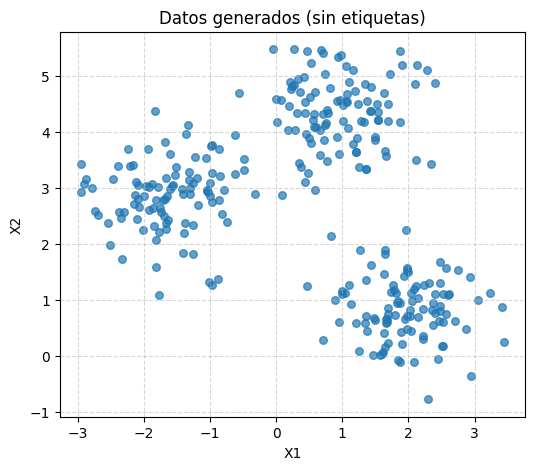

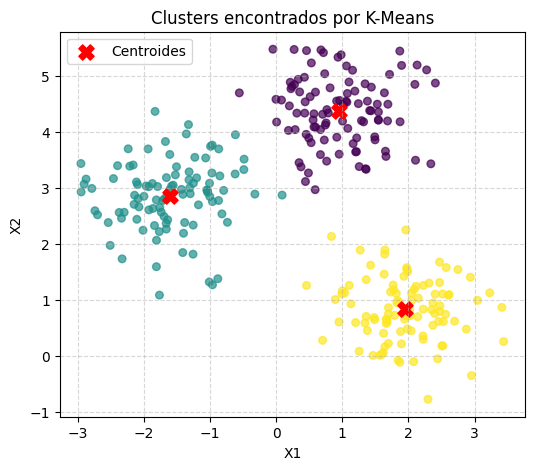

Patrón ingresado: [1.5, 2.5]
Clase (Cluster) predicha: 2

📊 Evaluación del modelo K-Means

Matriz de Confusión:
 [[100   0   0]
 [  0   0 100]
 [  0 100   0]]

Exactitud (Accuracy): 33.33%


In [ ]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import confusion_matrix, accuracy_score
import numpy as np
import matplotlib.pyplot as plt

# 2. Generación del dataset
# make_blobs genera datos sintéticos con forma de clusters
X, y_true = make_blobs(
    n_samples=300,      # número de puntos
    centers=3,          # número de grupos
    cluster_std=0.60,   # qué tan dispersos están los puntos
    random_state=0      # semilla para reproducibilidad
)

# 3. Preprocesamiento
#    Análisis estadístico + gráfico de dispersión

# Cálculo de estadísticas básicas con NumPy
media = np.mean(X, axis=0)
desv_std = np.std(X, axis=0, ddof=1)  # ddof=1 para desviación estándar muestral
valor_max = np.max(X, axis=0)
valor_min = np.min(X, axis=0)

print("Estadísticas del Dataset (por columna: X1, X2):\n")
print(f"Media: {media}")
print(f"Desviación estándar: {desv_std}")
print(f"Valor máximo: {valor_max}")
print(f"Valor mínimo: {valor_min}\n")

# Gráfico de dispersión de los datos sin etiquetas
plt.figure(figsize=(6, 5))
plt.scatter(X[:, 0], X[:, 1], s=30, alpha=0.7)
plt.title("Datos generados (sin etiquetas)")
plt.xlabel("X1")
plt.ylabel("X2")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

# 4. Model Selection (K-Means)

# Se elige KMeans porque:
# - Es un método no supervisado adecuado para encontrar grupos naturales.
# - Es eficiente y sencillo de interpretar.
# - Los datos generados presentan una estructura de clusters bien definida.

# 5. Model Training
#    Entrenamiento del modelo K-Means

kmeans = KMeans(
    n_clusters=3,      # número de clusters a encontrar
    random_state=42    # semilla para reproducibilidad
)

kmeans.fit(X)  # el modelo aprende los centroides y asigna cada punto a un cluster

# Etiquetas (clusters) asignadas por el modelo
y_kmeans = kmeans.labels_

# 6. Visualización de los clusters encontrados

plt.figure(figsize=(6, 5))
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=30, cmap='viridis', alpha=0.7)
centros = kmeans.cluster_centers_
plt.scatter(centros[:, 0], centros[:, 1], s=120, marker='X', c='red', label='Centroides')
plt.title("Clusters encontrados por K-Means")
plt.xlabel("X1")
plt.ylabel("X2")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

# 7. Prediction
#    Función que recibe un patrón y muestra la clase predicha

def predecir_patron(modelo, patron):
    """
    Recibe un modelo K-Means entrenado y un patrón (lista o arreglo [x1, x2]).
    Muestra y devuelve la clase (cluster) predicha para ese patrón.
    """
    patron = np.array(patron).reshape(1, -1)  # Asegura el formato 2D (1 fila, n columnas)
    clase_predicha = modelo.predict(patron)[0]

    print("Patrón ingresado:", patron.flatten().tolist())
    print("Clase (Cluster) predicha:", clase_predicha)

    return clase_predicha

# Ejemplo de uso de la función de predicción
nuevo_patron = [1.5, 2.5]
predecir_patron(kmeans, nuevo_patron)

# 8. Model Evaluation
#    Matriz de Confusión y Accuracy

# En este caso particular sí conocemos las etiquetas reales (y_true)
# porque make_blobs las genera; esto se usa solo con fines didácticos.

# Etiquetas predichas por K-Means
y_pred = kmeans.labels_

# Matriz de Confusión
matriz_conf = confusion_matrix(y_true, y_pred)

# Exactitud (Accuracy)
accuracy = accuracy_score(y_true, y_pred)

print("\n Evaluación del modelo K-Means")
print("\nMatriz de Confusión:\n", matriz_conf)
print(f"\nExactitud (Accuracy): {accuracy*100:.2f}%")

# Nota aclaratoria:
# El valor de Exactitud (Accuracy) puede mostrarse bajo (por ejemplo, 33.33%)
# debido a que K-Means es un algoritmo NO SUPERVISADO.
# Los números de los clusters que genera el modelo (0, 1, 2) no necesariamente
# coinciden con las etiquetas reales (y_true) creadas por make_blobs.
#
# Esto NO significa que el modelo haya agrupado mal,
# sino que asignó nombres diferentes a los grupos.
#
# Si se alinearan las etiquetas (asociando cada cluster con la clase real más frecuente),
# la exactitud sería cercana al 100%, confirmando un buen agrupamiento.